In [42]:
libraries <- c("ggplot2", "dplyr", "lubridate", "readr", "plotly", "corrplot", "forcats", "scatterplot3d", "tidyverse")

sapply(libraries, require, character.only = TRUE)

Loading required package: corrplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘corrplot’”
Loading required package: scatterplot3d

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘scatterplot3d’”


ggplot2         dplyr     lubridate         readr        plotly 
         TRUE          TRUE          TRUE          TRUE          TRUE 
     corrplot       forcats scatterplot3d     tidyverse 
        FALSE          TRUE         FALSE          TRUE

In [43]:
walmart_data <- read_csv("/content/Walmart.csv", show_col_types = FALSE)
head(walmart_data)

Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,05-02-2010,1643691,0,42.31,2.572,211.0964,8.106
1,12-02-2010,1641957,1,38.51,2.548,211.2422,8.106
1,19-02-2010,1611968,0,39.93,2.514,211.2891,8.106
1,26-02-2010,1409728,0,46.63,2.561,211.3196,8.106
1,05-03-2010,1554807,0,46.50,2.625,211.3501,8.106
1,12-03-2010,1439542,0,57.79,2.667,211.3806,8.106


In [44]:
num_row <- nrow(walmart_data)
num_col <- ncol(walmart_data)
sprintf("The dataset has %s samples and %s features", num_row, num_col)

[1] "The dataset has 6435 samples and 8 features"

In [45]:
apply(X = is.na(walmart_data), MARGIN = 2, FUN = sum)

Store         Date Weekly_Sales Holiday_Flag  Temperature   Fuel_Price 
           0            0            0            0            0            0 
         CPI Unemployment 
           0            0

In [46]:
sort(sapply(walmart_data, function(x) length(unique(x))))

Holiday_Flag        Store         Date Unemployment   Fuel_Price          CPI 
           2           45          143          349          892         2145 
 Temperature Weekly_Sales 
        3528         6435

In [47]:
str(walmart_data)


spc_tbl_ [6,435 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Store       : num [1:6435] 1 1 1 1 1 1 1 1 1 1 ...
 $ Date        : chr [1:6435] "05-02-2010" "12-02-2010" "19-02-2010" "26-02-2010" ...
 $ Weekly_Sales: num [1:6435] 1643691 1641957 1611968 1409728 1554807 ...
 $ Holiday_Flag: num [1:6435] 0 1 0 0 0 0 0 0 0 0 ...
 $ Temperature : num [1:6435] 42.3 38.5 39.9 46.6 46.5 ...
 $ Fuel_Price  : num [1:6435] 2.57 2.55 2.51 2.56 2.62 ...
 $ CPI         : num [1:6435] 211 211 211 211 211 ...
 $ Unemployment: num [1:6435] 8.11 8.11 8.11 8.11 8.11 ...
 - attr(*, "spec")=
  .. cols(
  ..   Store = col_double(),
  ..   Date = col_character(),
  ..   Weekly_Sales = col_double(),
  ..   Holiday_Flag = col_double(),
  ..   Temperature = col_double(),
  ..   Fuel_Price = col_double(),
  ..   CPI = col_double(),
  ..   Unemployment = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [48]:
summary(walmart_data)

     Store        Date            Weekly_Sales      Holiday_Flag    
 Min.   : 1   Length:6435        Min.   : 209986   Min.   :0.00000  
 1st Qu.:12   Class :character   1st Qu.: 553350   1st Qu.:0.00000  
 Median :23   Mode  :character   Median : 960746   Median :0.00000  
 Mean   :23                      Mean   :1046965   Mean   :0.06993  
 3rd Qu.:34                      3rd Qu.:1420159   3rd Qu.:0.00000  
 Max.   :45                      Max.   :3818686   Max.   :1.00000  
  Temperature       Fuel_Price         CPI         Unemployment   
 Min.   : -2.06   Min.   :2.472   Min.   :126.1   Min.   : 3.879  
 1st Qu.: 47.46   1st Qu.:2.933   1st Qu.:131.7   1st Qu.: 6.891  
 Median : 62.67   Median :3.445   Median :182.6   Median : 7.874  
 Mean   : 60.66   Mean   :3.359   Mean   :171.6   Mean   : 7.999  
 3rd Qu.: 74.94   3rd Qu.:3.735   3rd Qu.:212.7   3rd Qu.: 8.622  
 Max.   :100.14   Max.   :4.468   Max.   :227.2   Max.   :14.313  

In [49]:
class(walmart_data$Date)

[1] "character"

In [50]:
walmart_data<-walmart_data %>%
  mutate(Date=dmy(Date))

In [51]:
sprintf("The data type of the Date variable is: %s", class(walmart_data$Date) )

[1] "The data type of the Date variable is: Date"

In [54]:
## Classifying fuel prices
walmart_data <-
  walmart_data %>% mutate(Sts_Fuel_Price = ifelse(Fuel_Price < mean(walmart_data$Fuel_Price), "Low", "High"))

In [55]:
## Classifying temperature
walmart_data <-
  walmart_data %>% mutate(Sts_Temperature = case_when(
    Temperature <= quantile(walmart_data$Temperature, c(0.25)) ~ "Cool",
    Temperature > quantile(walmart_data$Temperature, c(0.50)) &
     Temperature <= quantile(walmart_data$Temperature, c(0.75)) ~ "Cold",
    T ~ "Hot"))

In [56]:
## Classifying CPI

walmart_data <-
  walmart_data %>% mutate(Sts_CPI = ifelse(
    CPI > mean(walmart_data$CPI), "High", "Low"
  ))

In [57]:
## Filtering day, month and year from Date

Weekday <- day(walmart_data$Date)
Month <- month(walmart_data$Date)
Year <- year(walmart_data$Date)

In [58]:
## Add Day column

walmart_data <- walmart_data %>%
  cbind(Weekday)

## Add Month column

walmart_data <- walmart_data %>%
  cbind(Month)

## Add Year column
walmart_data <- walmart_data %>%
  cbind(Year)

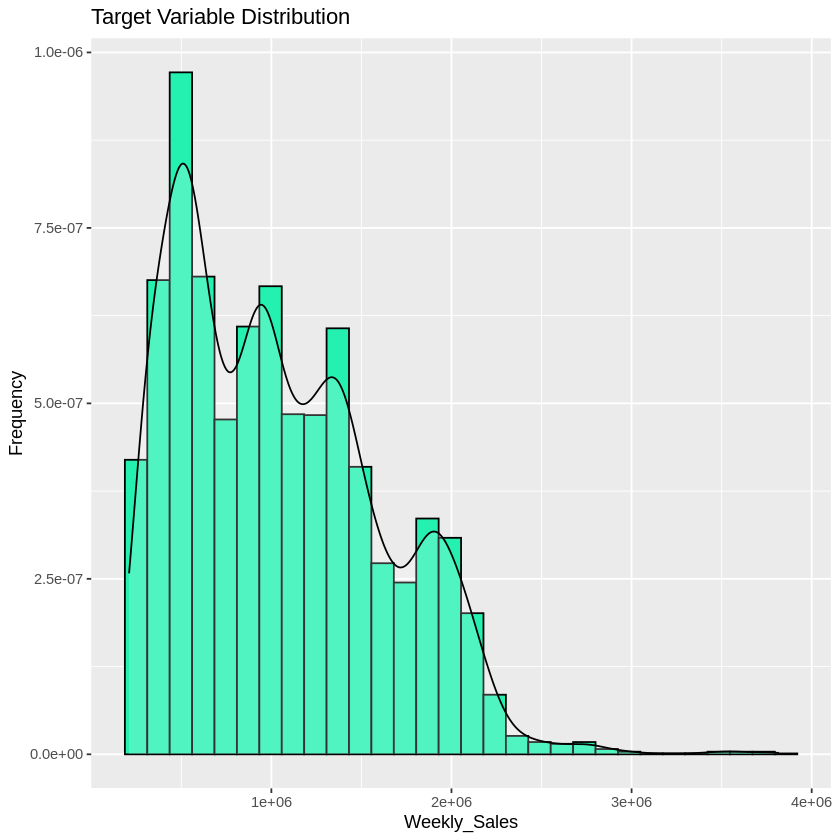

In [59]:
# Target variable distribution

ggplot(walmart_data, aes(x = Weekly_Sales)) +

geom_histogram(aes(y=after_stat(density)),
               color = 'black',
               fill = "#24F1B0",
               bins = 30) +

  geom_density(alpha = 0.2, fill="white") +

ggtitle('Target Variable Distribution') +
labs(y = 'Frequency')

###The Target Variable seems to be be normally distributed, averaging around 20 units

In [60]:
## Select numeric features

walmart_numeric_features <- walmart_data %>%
    select(Store, Weekly_Sales, Holiday_Flag, Temperature,
         Fuel_Price, CPI, Unemployment, Weekday, Month, Year)

In [61]:
## Correlation between numeric variables

round(abs(cor(walmart_numeric_features)), 3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekday,Month,Year
Store,1.000,0.335,0.000,0.023,0.060,0.209,0.224,0.000,0.000,0.000
Weekly_Sales,0.335,1.000,0.037,0.064,0.009,0.073,0.106,0.017,0.076,0.018
Holiday_Flag,0.000,0.037,1.000,0.155,0.078,0.002,0.011,0.045,0.123,0.057
Temperature,0.023,0.064,0.155,1.000,0.145,0.177,0.101,0.027,0.236,0.064
Fuel_Price,0.060,0.009,0.078,0.145,1.000,0.171,0.035,0.028,0.042,0.779
CPI,0.209,0.073,0.002,0.177,0.171,1.000,0.302,0.003,0.005,0.075
Unemployment,0.224,0.106,0.011,0.101,0.035,0.302,1.000,0.004,0.013,0.242
Weekday,0.000,0.017,0.045,0.027,0.028,0.003,0.004,1.000,0.015,0.006
Month,0.000,0.076,0.123,0.236,0.042,0.005,0.013,0.015,1.000,0.194
Year,0.000,0.018,0.057,0.064,0.779,0.075,0.242,0.006,0.194,1.000


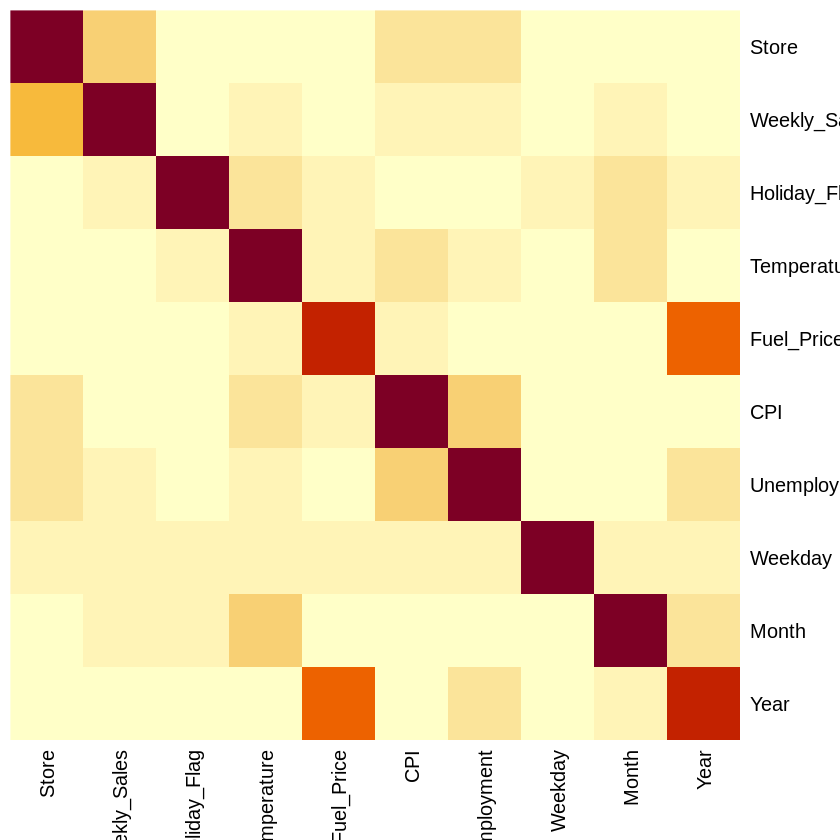

In [62]:
## Heatmap

heatmap(abs(cor(walmart_numeric_features)), Rowv = NA, Colv = NA, revC = T)

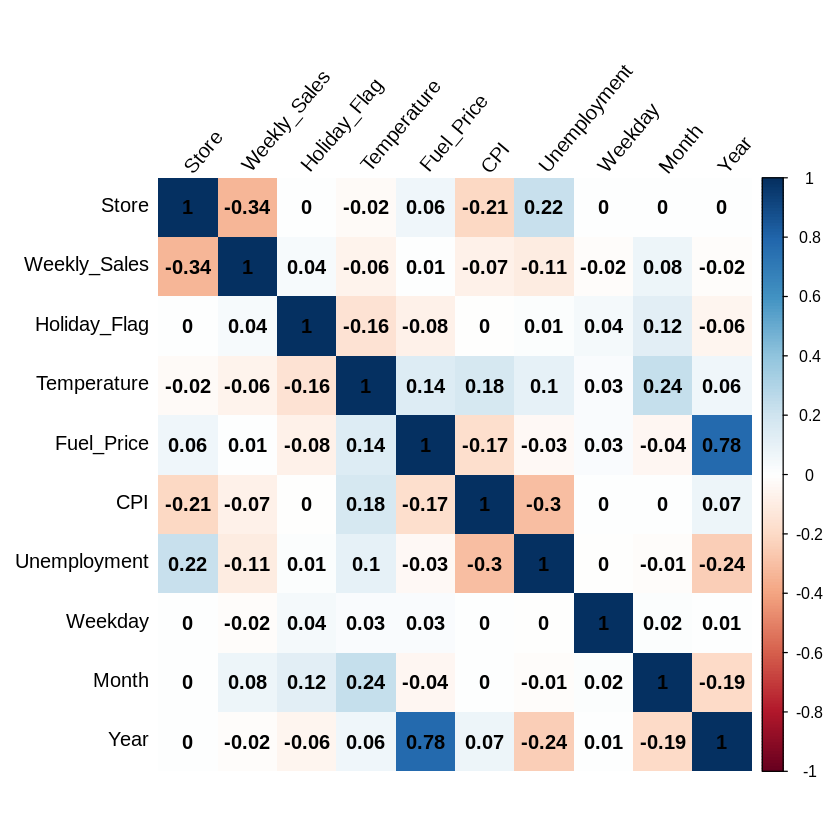

In [65]:
## Corrplot

corrplot(cor(walmart_numeric_features), method='shade', shade.col= NA,
         tl.col = "black", tl.srt = 50, addCoef.col = 'black')

###Inference: The correlation between the dependent variable ( Weekly_Sales) and the dependent variables is relatively low

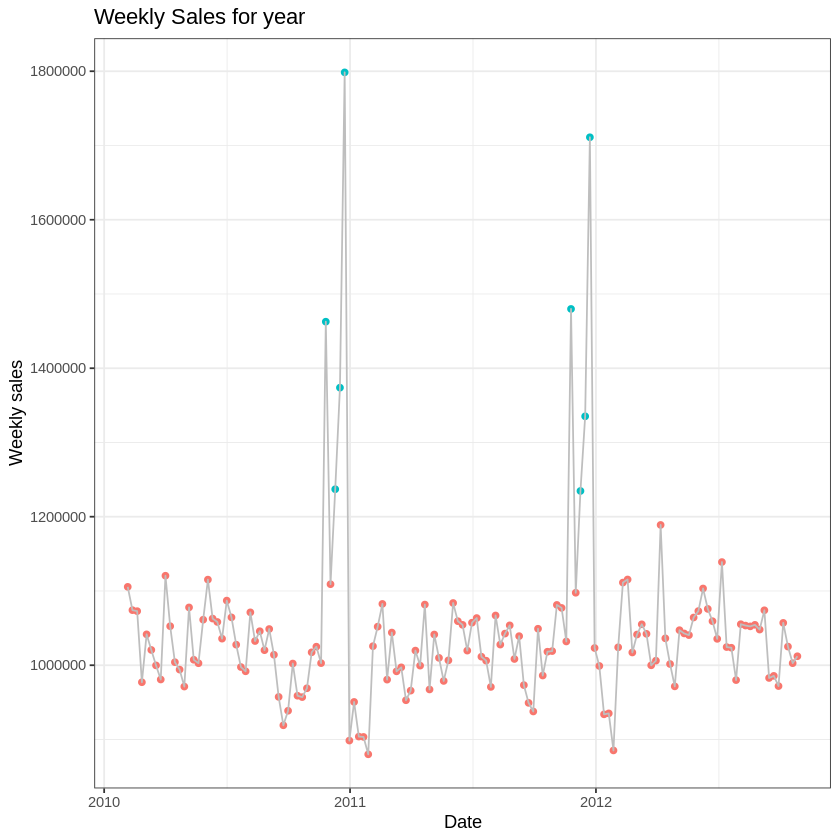

In [66]:
# Weekly sales for year

walmart_data%>%
  group_by(Date)%>%

  summarise(Weekly_Sales = mean(Weekly_Sales, na.rm=T)) %>%

  ggplot(aes(Date, Weekly_Sales)) +

  geom_point(aes(color=Weekly_Sales>1200000),
             show.legend = F) +
  geom_line(color='grey') +

  labs(title = 'Weekly Sales for year',
       y='Weekly sales',
       x='Date') +

    theme_bw()

###Inference: some dates have extreme high weekly sales.

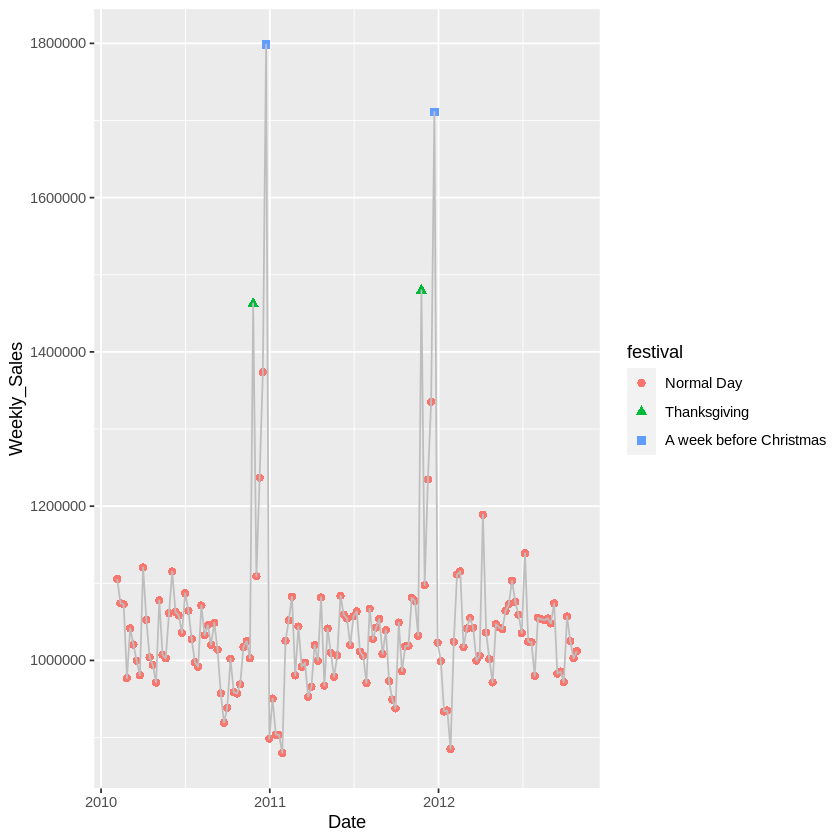

In [67]:
# Holiday and Non-Holiday sales

holidays <-function(x){
  cut(x,
      breaks = ymd(20100101, 20101126, 20101127, 20101224,20101225,
                   20111125, 20111126, 20111223, 20111224,20121123,
                   20121124, 20121221, 20121222, 20130101),

      labels = c('Normal Day','Thanksgiving',
                 'Normal Day', 'A week before Christmas',
                 'Normal Day', 'Thanksgiving',
                 'Normal Day', 'A week before Christmas',
                 'Normal Day', 'Thanksgiving',
                 'Normal Day', 'A week before Christmas',
                 'Normal Day'))
}

walmart_data <- walmart_data %>%
  mutate(festival = holidays(Date))

walmart_data %>%
  group_by(Date)%>%

  mutate(Weekly_Sales = mean(Weekly_Sales, na.rm=T)) %>%

  ggplot(aes(Date, Weekly_Sales)) +

  geom_point(aes(color = festival,
                 shape = festival),
             size = 2)+
  geom_line(group=1, color='grey')

###Inference : festival will lead to high weekly sales, especially a week before the Chritmas and the Thanksgiving.

In [68]:
## Annual Sales
Annual_Sales <-
  aggregate(Weekly_Sales ~ Year, walmart_data, sum)

Annual_Sales <- Annual_Sales[order(-Annual_Sales$Weekly_Sales), ]

print(Annual_Sales)

  Year Weekly_Sales
2 2011   2448200007
1 2010   2288886120
3 2012   2000132859


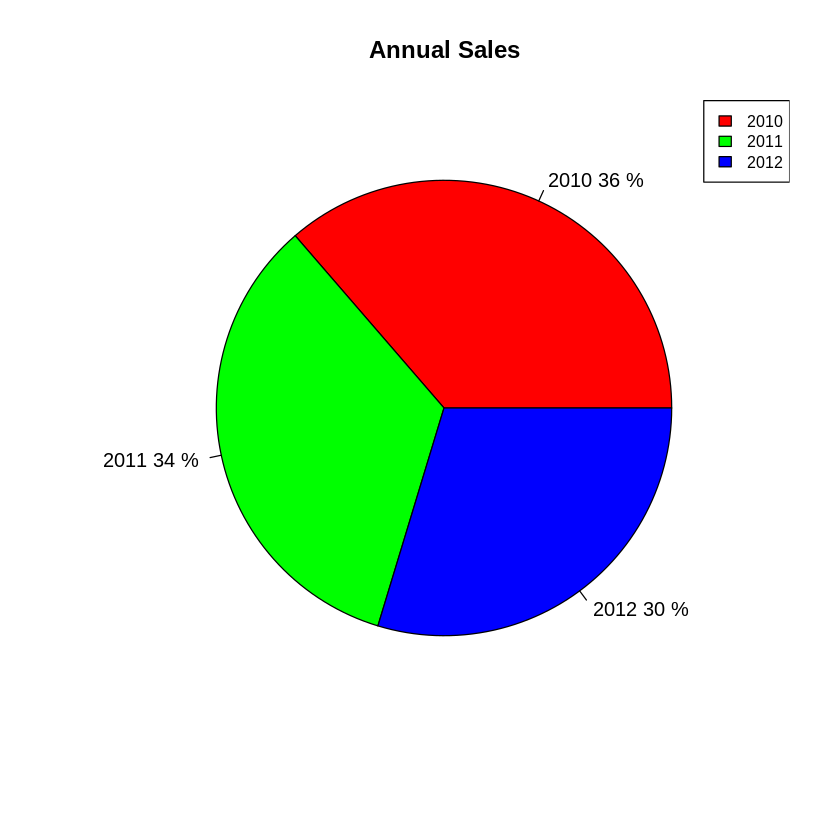

In [69]:
## Annual sales pie plot

sales <- Annual_Sales$Weekly_Sales
labels <- c('2010', '2011', '2012' )
porcent <- round(sales/sum(sales)*100)
labels <- paste(labels, porcent, "%", sep = " ")

pie(sales,
    labels = labels,
    col = rainbow(length(labels)),
    main = "Annual Sales")

legend("topright", c("2010", "2011", "2012"),
       cex = 0.8,
       fill = rainbow(length(labels)))

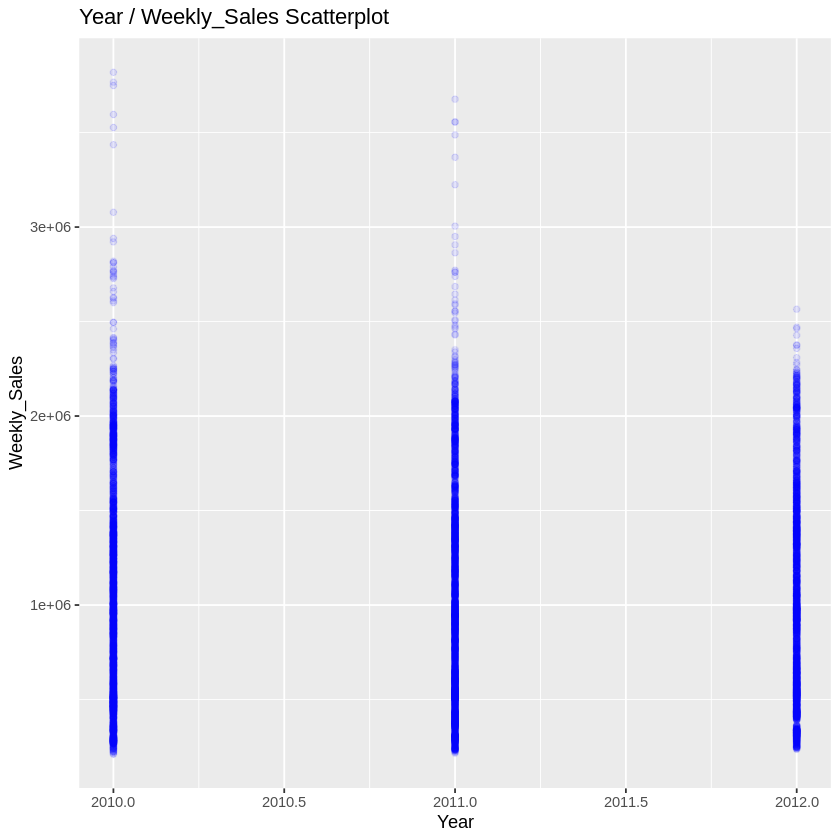

In [70]:
# Scatterplot: Year-weekly sales

walmart_data %>%

  ggplot(aes(x = Year,
             y = Weekly_Sales)) +
  geom_point(alpha = 0.1,
             colour = 'blue') +

  labs(title =
         'Year / Weekly_Sales Scatterplot',
       x='Year',
       y='Weekly_Sales')

###Inferece:


1.   The years 2010 and 2011 reported higher earnings.

2.   The years 2010 and 2011 present atypical data.




In [71]:
## Top 10 stores

Store_Sales <-
  aggregate(Weekly_Sales ~ Store, walmart_data, sum)

Top_10_Stores <- head(Store_Sales[order(-Store_Sales$Weekly_Sales), ], 10)

print(Top_10_Stores)

   Store Weekly_Sales
20    20    301397792
4      4    299543953
14    14    288999911
13    13    286517704
2      2    275382441
10    10    271617714
27    27    253855917
6      6    223756131
1      1    222402809
39    39    207445542


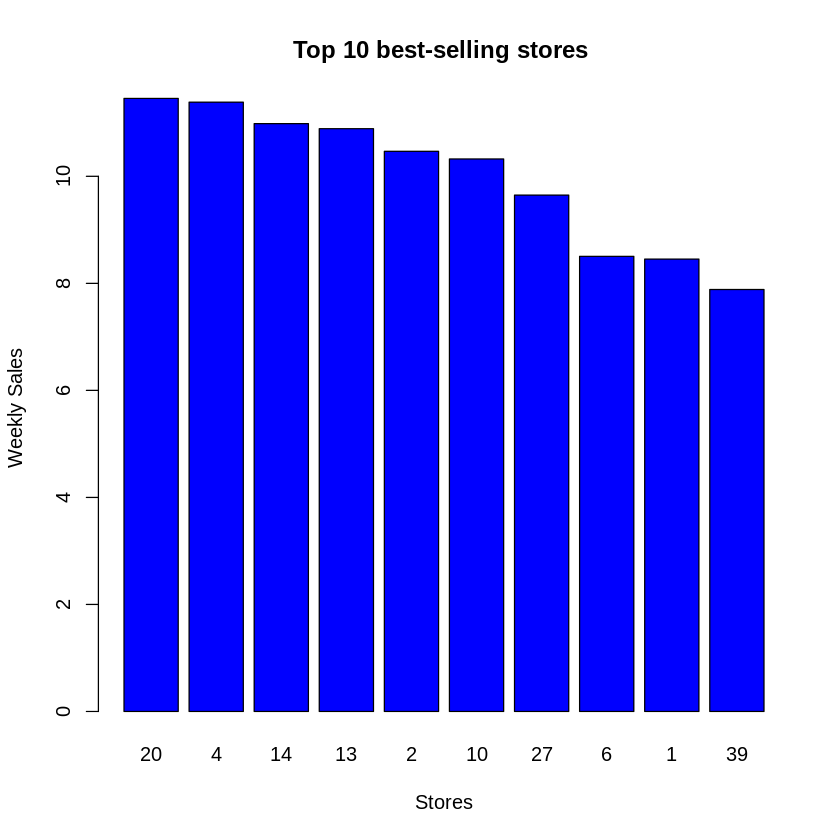

In [72]:
## Barplot (Relative Frequency)

barplot(prop.table(Top_10_Stores$Weekly_Sales) * 100,
        names.arg = c(Top_10_Stores$Store),
        col = 'blue',
        main = "Top 10 best-selling stores ",
        xlab = "Stores",
        ylab = "Weekly Sales")

###Inference: The 20th store reported more annual sales.

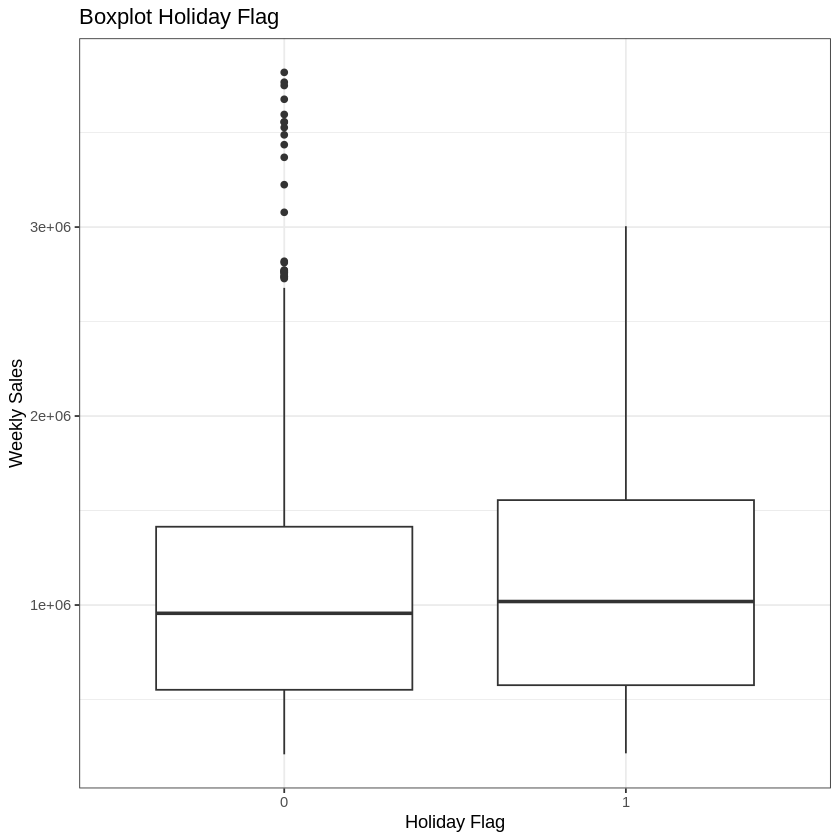

In [74]:
# Boxplot holiday flags-Weekly sales

walmart_data %>%
  ggplot(aes(as_factor(Holiday_Flag), Weekly_Sales)) +

  geom_boxplot() +
  labs(title = "Boxplot Holiday Flag",
       x = "Holiday Flag",
       y = "Weekly Sales") +

   theme_bw()

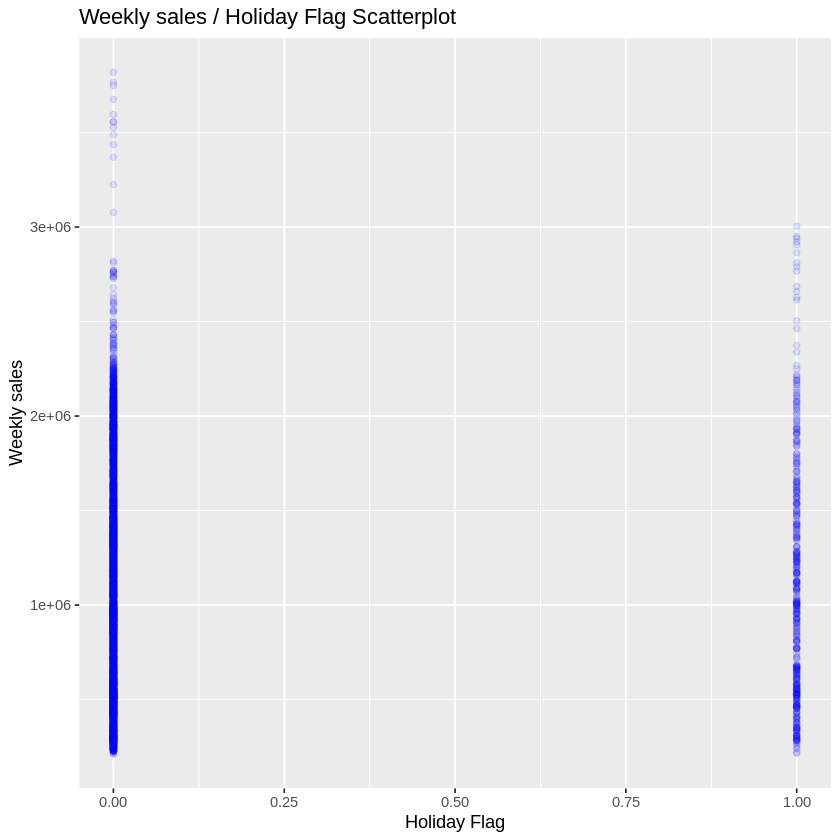

In [75]:
## Scatterplot Weekly Sales / Holiday Flag

walmart_data %>%
  ggplot(aes(x = Holiday_Flag,
             y = Weekly_Sales)) +
  geom_point(alpha = 0.1,
             colour = 'blue') +

  labs(title =
         'Weekly sales / Holiday Flag Scatterplot',
       y='Weekly sales',
       x='Holiday Flag')

In [76]:
# Holiday flags sales

Sales_Holidays <-
  aggregate(Weekly_Sales ~ Holiday_Flag, walmart_data, sum)

Sales_Holidays <-
  Sales_Holidays[order(-Sales_Holidays$Holiday_Flag),]

print(Sales_Holidays)

  Holiday_Flag Weekly_Sales
2            1    505299552
1            0   6231919436


###Inference:

1.   There are more sales in Non-Holiday week.
2.   However, there is more revenues in Holiday week.
3.   There are outliers in Non-holiday week



In [77]:
# Weekly Sales / Fuel_Price

Sales_vs_Fuel_Price <-
  aggregate(Weekly_Sales ~ Sts_Fuel_Price, walmart_data, sum)

print(Sales_vs_Fuel_Price)

  Sts_Fuel_Price Weekly_Sales
1           High   3628932238
2            Low   3108286749


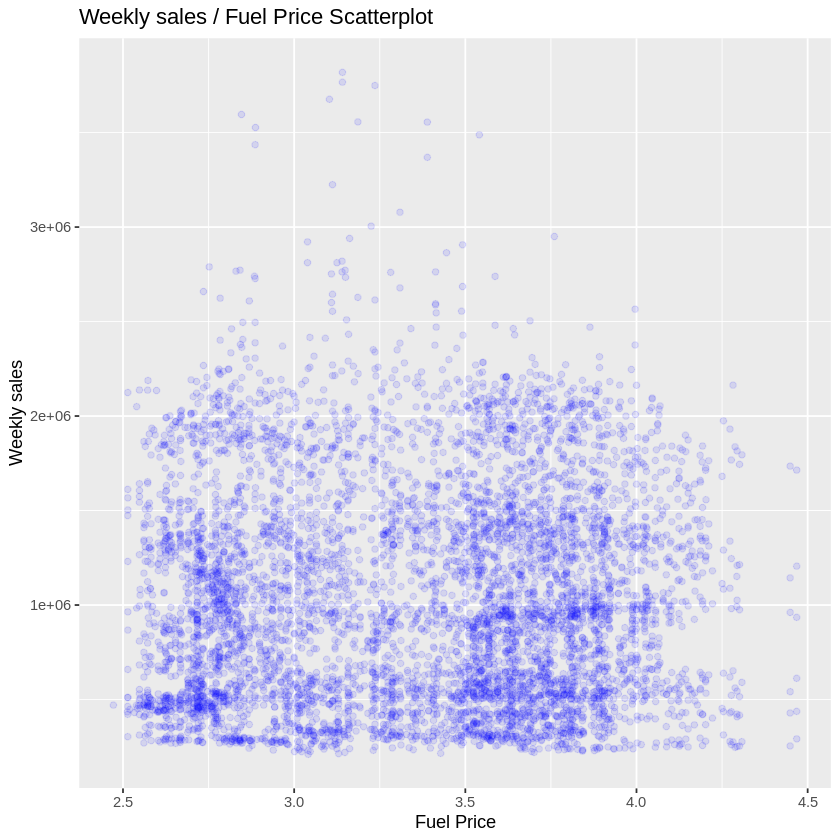

In [79]:
# Scatterplot: weekly sales / fuel price

walmart_data %>%
  ggplot(aes(x = Fuel_Price,
             y = Weekly_Sales)) +
  geom_point(alpha = 0.1,
             colour = 'blue') +

  labs(title =
         'Weekly sales / Fuel Price Scatterplot',
       y='Weekly sales',
       x='Fuel Price')

### Inference: There are more people to shop in specific fuel price.

In [80]:
# Total Sales and CPI

Sales_vs_CPI <-
  aggregate(Weekly_Sales ~ Sts_CPI, walmart_data, sum)

print(Sales_vs_CPI)

  Sts_CPI Weekly_Sales
1    High   3330247700
2     Low   3406971287


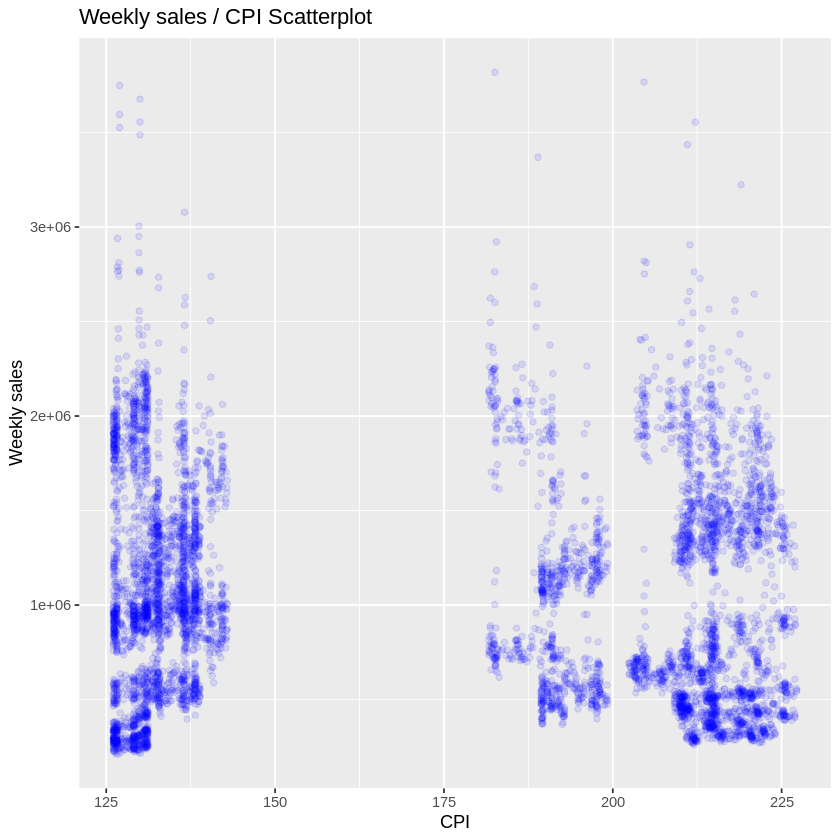

In [82]:
# Scatterplot: weekly sales / CPI

walmart_data %>%
  ggplot(aes(x = CPI,
             y = Weekly_Sales)) +
  geom_point(alpha = 0.1,
             colour = 'blue') +

  labs(title =
         'Weekly sales / CPI Scatterplot',
       y='Weekly sales',
       x='CPI')

###Inference:
.  Walmart

1.  Seems that different range of CPI have same sales distributions
2.   Walmart reported higher profits when fuel prices and CPI were high and when the temperature was cold


In [83]:
## Weekly_Sales / Temperature

Sales_vs_Temperature <-
  aggregate(Weekly_Sales ~ Sts_Temperature, walmart_data, sum)

print(Sales_vs_Temperature)

  Sts_Temperature Weekly_Sales
1            Cold   1696418667
2            Cool   1758497608
3             Hot   3282302713


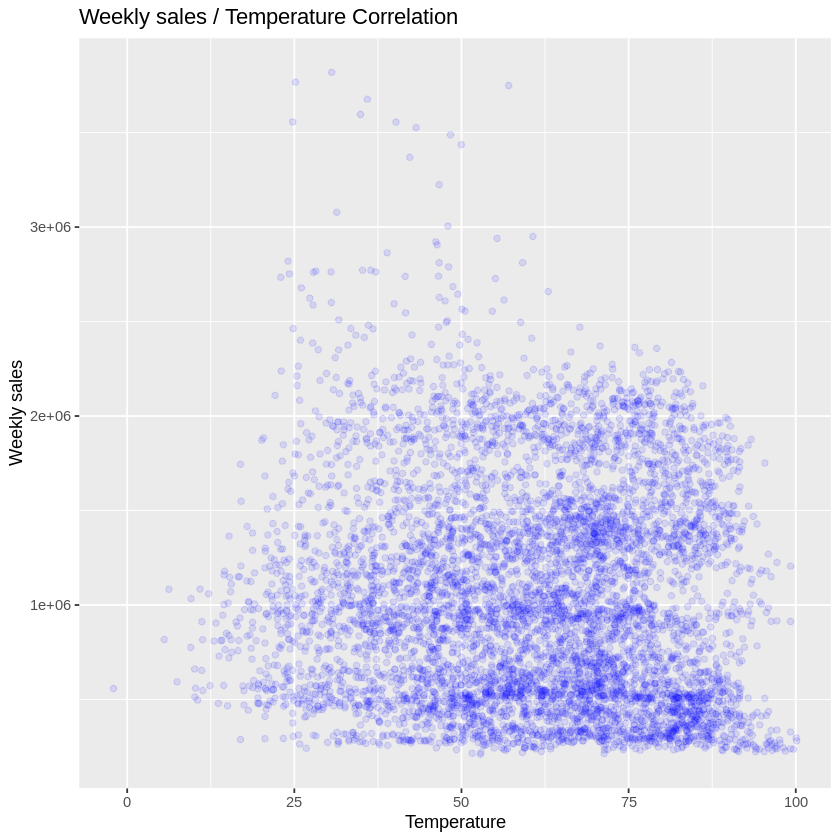

In [85]:
## Distribution Weekly_sale/Temperature

walmart_data %>%
  ggplot(aes(x = Temperature,
             y = Weekly_Sales)) +
  geom_point(alpha = 0.1,
             colour = 'blue') +

  labs(title =
         'Weekly sales / Temperature Correlation',
       y='Weekly sales',
       x='Temperature')

### Inference: Some people go shopping when the temperature is between 40 and 75 degrees Farenheint

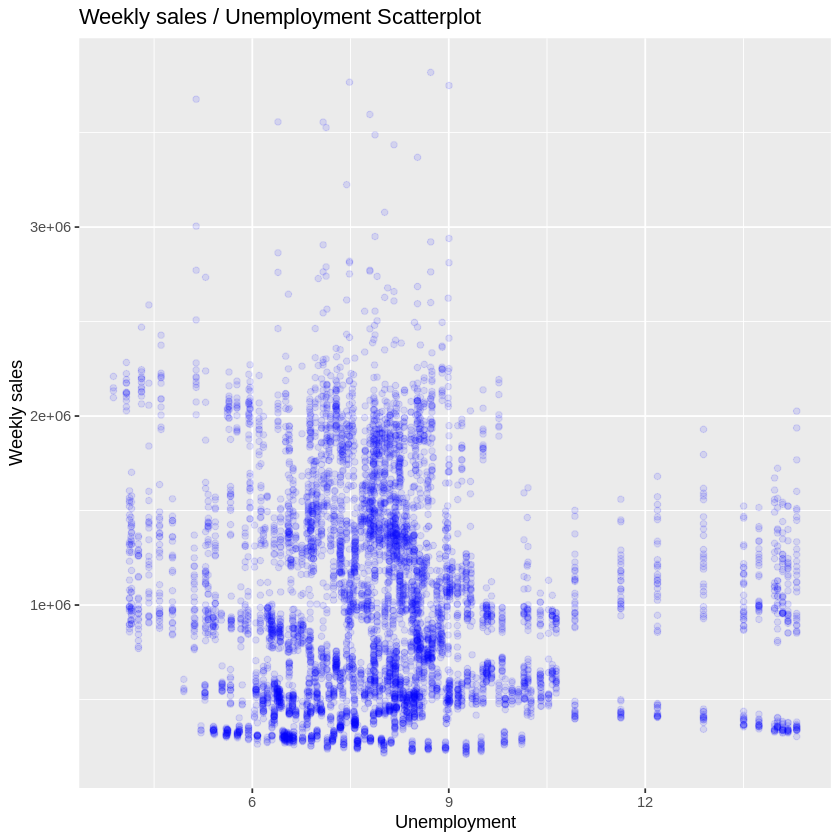

In [87]:
# Scatterplot Weekly Sales / Unemployment

walmart_data %>%
  ggplot(aes(x = Unemployment,
             y = Weekly_Sales)) +
  geom_point(alpha = 0.1,
             colour = 'blue') +

  labs(title =
         'Weekly sales / Unemployment Scatterplot',
       y='Weekly sales',
       x='Unemployment')

###Inference: Lower unemployment rate has higher weekly sales.

In [88]:
Sales_2010 <- subset(walmart_data, Year == 2010)
Sales_2011 <- subset(walmart_data, Year == 2011)
Sales_2012 <- subset(walmart_data, Year == 2012)

In [89]:
## Total sales 2010

Total_Sales_2010 <-
  aggregate(Weekly_Sales ~ Store, Sales_2010, sum)

Sales_Top5_2010 <-
  head(Total_Sales_2010[order(-Total_Sales_2010$Weekly_Sales), ], 5)

print(Sales_Top5_2010)

   Store Weekly_Sales
14    14    105462242
20    20    101733081
4      4     95680471
2      2     95277864
13    13     95272735


In [90]:
## Total sales per month (2010)

Total_Sales_per_Month_2010 <-
  aggregate(Weekly_Sales ~ Month, Sales_2010, sum)
Total_Sales_per_Month_2010 <- Total_Sales_per_Month_2010[order(-Total_Sales_per_Month_2010$Weekly_Sales),]

print(Total_Sales_per_Month_2010)

   Month Weekly_Sales
11    12    288760533
6      7    232580126
3      4    231412368
9     10    217161824
10    11    202853370
5      6    192246172
1      2    190332983
7      8    187640111
4      5    186710934
2      3    181919802
8      9    177267896


In [91]:
## Total sales per holidays (2010)

Sales_Holidays_2010 <-
  aggregate(Weekly_Sales ~ Holiday_Flag, Sales_2010, sum)

Sales_Holidays_2010 <-
  Sales_Holidays_2010[order(-Sales_Holidays_2010$Holiday_Flag),]

print(Sales_Holidays_2010)

  Holiday_Flag Weekly_Sales
2            1    200224598
1            0   2088661523


In [92]:
## Total sales and fuel prices (2010)

Sales_vs_Fuel_Price_2010 <-
  aggregate(Weekly_Sales ~ Sts_Fuel_Price, Sales_2010, sum)

print(Sales_vs_Fuel_Price_2010)

  Sts_Fuel_Price Weekly_Sales
1            Low   2288886120


In [93]:
## Total sales and CPI (2010)

Sales_vs_CPI_2010 <-
  aggregate(Weekly_Sales ~ Sts_CPI, Sales_2010, sum)

Sales_vs_CPI_2010 <-
  Sales_vs_CPI_2010[order(-Sales_vs_CPI_2010$Weekly_Sales),]

print(Sales_vs_CPI_2010)

  Sts_CPI Weekly_Sales
2     Low   1164241673
1    High   1124644447


In [94]:
## Total sales and temperature (2010)

Sales_vs_Temperature_2010 <-
  aggregate(Weekly_Sales ~ Sts_Temperature, Sales_2010, sum)

Sales_vs_Temperature_2010 <-
  Sales_vs_Temperature_2010[order(-Sales_vs_Temperature_2010$Weekly_Sales),]

print(Sales_vs_Temperature_2010)

  Sts_Temperature Weekly_Sales
3             Hot   1117750478
2            Cool    624263738
1            Cold    546871904


### Inference:



1.   There are more revenues in Holiday week.
2.   The month of December was reported with more revenues.
3.   The 14th store reported more annual sales.
4.   Higher revenues were recorded when fuel prices and CPI were low and the temperature was hot.



In [95]:
## Total sales (2011)

Total_Sales_2011 <-
  aggregate(Weekly_Sales ~ Store, Sales_2011, sum)

Sales_Top_5_2011 <-
  head(Total_Sales_2011[order(-Total_Sales_2011$Weekly_Sales), ], 5)

print(Sales_Top_5_2011)

   Store Weekly_Sales
4      4    111092293
20    20    109837002
14    14    106096271
13    13    104537513
10    10     98916895


In [96]:
## Total sales per month (2011)

Total_Sales_per_Month_2011 <-
  aggregate(Weekly_Sales ~ Month, Sales_2011, sum)
Total_Sales_per_Month_2011 <- Total_Sales_per_Month_2011[order(-Total_Sales_per_Month_2011$Weekly_Sales),]

print(Total_Sales_per_Month_2011)

   Month Weekly_Sales
12    12    288078102
7      7    229911399
4      4    226526511
9      9    220847738
11    11    210162355
6      6    189773385
8      8    188599332
2      2    186331328
10    10    183261283
5      5    181648158
3      3    179356448
1      1    163703967


In [97]:
## Total sales per holidays (2011)

Sales_Holidays_2011 <-
  aggregate(Weekly_Sales ~ Holiday_Flag, Sales_2011, sum)

Sales_Holidays_2011 <-
  Sales_Holidays_2011[order(-Sales_Holidays_2011$Holiday_Flag),]

print(Sales_Holidays_2011)

  Holiday_Flag Weekly_Sales
2            1    206735487
1            0   2241464521


In [98]:
## Total sales and Fuel prices (2011)

Sales_vs_Fuel_Price_2011 <-
  aggregate(Weekly_Sales ~ Sts_Fuel_Price, Sales_2011, sum)

Sales_vs_Fuel_Price_2011 <-
  Sales_vs_Fuel_Price_2011[order(-Sales_vs_Fuel_Price_2011$Weekly_Sales), ]

print(Sales_vs_Fuel_Price_2011)

  Sts_Fuel_Price Weekly_Sales
1           High   1847344472
2            Low    600855535


In [99]:
## Total sales and CPI (2011)

Sales_vs_CPI_2011 <-
  aggregate(Weekly_Sales ~ Sts_CPI, Sales_2011, sum)

Sales_vs_CPI_2011 <-
  Sales_vs_CPI_2011[order(-Sales_vs_CPI_2011$Weekly_Sales),]

print(Sales_vs_CPI_2011)

  Sts_CPI Weekly_Sales
2     Low   1234010115
1    High   1214189892


In [100]:
## Total sales and temperature (2011)

Sales_vs_Temperature_2011 <-
  aggregate(Weekly_Sales ~ Sts_Temperature, Sales_2011, sum)

Sales_vs_Temperature_2011 <-
  Sales_vs_Temperature_2011[order(-Sales_vs_Temperature_2011$Weekly_Sales),]

print(Sales_vs_Temperature_2011)

  Sts_Temperature Weekly_Sales
3             Hot   1087110090
2            Cool    772472295
1            Cold    588617623


###Inference:


1.   There are more revenues in Holiday week.
2.   The 4th store reported more annual sales.
3.   The month of December was reported with more revenues.
4.   Higher revenues were recorded when fuel prices was high, CPI was low and the temperature was Hot.






In [101]:
## Total sales (2012)

Total_Sales_per_Store_2012 <-
  aggregate(Weekly_Sales ~ Store, Sales_2012, sum)

Sales_Top5_2012 <-
  head(Total_Sales_per_Store_2012[order(-Total_Sales_per_Store_2012$Weekly_Sales),], 5)

print(Sales_Top5_2012)

   Store Weekly_Sales
4      4     92771189
20    20     89827709
13    13     86707455
2      2     81496695
10    10     78228617


In [102]:
## Total sales per month (2012)

Total_Sales_per_Month_2012 <-
  aggregate(Weekly_Sales ~ Month, Sales_2012, sum)

Total_Sales_per_Month_2012 <- Total_Sales_per_Month_2012[order(-Total_Sales_per_Month_2012$Weekly_Sales),]

print(Total_Sales_per_Month_2012)

   Month Weekly_Sales
6      6    240610329
8      8    236850766
3      3    231509650
2      2    192063580
4      4    188920906
5      5    188766479
7      7    187509452
10    10    184361680
9      9    180645544
1      1    168894472


In [103]:
## Total sales per holidays (2012)

Sales_Holidays_2012 <-
  aggregate(Weekly_Sales ~ Holiday_Flag, Sales_2012, sum)

Sales_Holidays_2012 <-
  Sales_Holidays_2012[order(-Sales_Holidays_2012$Holiday_Flag),]

print(Sales_Holidays_2012)

  Holiday_Flag Weekly_Sales
2            1     98339467
1            0   1901793392


In [104]:
## Total sales and Fuel prices (2012)

Sales_vs_Fuel_Price_2012 <-
  aggregate(Weekly_Sales ~ Sts_Fuel_Price, Sales_2012, sum)

Sales_vs_Fuel_Price_2010 <-
  Sales_vs_Fuel_Price_2012[order(-Sales_vs_Fuel_Price_2012$Weekly_Sales),]

print(Sales_vs_Fuel_Price_2012)

  Sts_Fuel_Price Weekly_Sales
1           High   1781587766
2            Low    218545093


In [105]:
## Total sales and CPI

Sales_vs_CPI_2012 <-
  aggregate(Weekly_Sales ~ Sts_CPI, Sales_2012, sum)

Sales_vs_CPI_2012 <-
  Sales_vs_CPI_2012[order(-Sales_vs_CPI_2012$Weekly_Sales),]

print(Sales_vs_CPI_2012)

  Sts_CPI Weekly_Sales
2     Low   1008719499
1    High    991413361


In [107]:
## Total sales and CPI

Sales_vs_CPI_2012 <-
  aggregate(Weekly_Sales ~ Sts_CPI, Sales_2012, sum)

Sales_vs_CPI_2012 <-
  Sales_vs_CPI_2012[order(-Sales_vs_CPI_2012$Weekly_Sales),]

print(Sales_vs_CPI_2012)

  Sts_CPI Weekly_Sales
2     Low   1008719499
1    High    991413361


### Inference:



1.   There are more revenues in Holiday week.
2.   The 4th store reported more annual sales.
3.   The month of June was reported with more revenues.
4.   Higher revenues were recorded when fuel prices was high, CPI was low and the temperature was cold.
5.   Only the first ten months are recorded.



# Conclusion :


*   The year 2010 was the year with the highest revenues, followed by 2011.
*   The stores with the highest revenues are number 14, 20 and 4.
*   In general, holidays have the highest revenues.
*   There are lower revenues when the temperature is low and higher revenues when the temperature is high.
*   There are higher revenues when the CPI is low.
*   The issue of rising fuel prices does not seem to affect store revenues.

